# BigData Final Project | Steam
## <font color = 'blue'> Notebook8 | Graph Knowledge </font>
### Team Member: Jim Fang, WooJong Choi, Han Jeon, Tam Nguyen

June 2020
___

### This notebook was run on both RCC and local machine:

- On RCC : create graphframes, group data...
- Local Machine: Visualization


---
## I. Import Libraries

In [4]:
from pyspark import SparkContext, SparkConf
from pyspark.context import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pyspark.sql.types as t
from pyspark.sql.types import LongType
from pyspark.sql.types import StringType
from pyspark.sql.functions import broadcast
from pyspark.sql.functions import regexp_replace
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import isnan, when, count, col, size
from pyspark.sql.functions import year, month, dayofmonth
from pyspark.sql.functions import length
from pyspark.sql import functions as sf
from pyspark.sql.functions import collect_set, collect_list, array_contains
from pyspark.sql.window import Window
from pyspark.sql.functions import monotonically_increasing_id, row_number
from pyspark.sql.functions import rank, dense_rank
from pyspark.sql.functions import desc
from functools import reduce
from pyspark.sql.functions import rand 

#Sparkml, spark mllib
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import mean, stddev, col
import numpy as np
import pandas as pd
import seaborn as sns


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

from graphframes import *
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
spark = SparkSession.builder.enableHiveSupport().appName('Graph').getOrCreate()

#change configuration settings on Spark 
sc = spark.sparkContext

In [3]:
!hdfs dfs -ls /user/tamng/jwht/EDA

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 12 items
drwxr-xr-x   - tamng tamng          0 2020-06-03 11:00 /user/tamng/jwht/EDA/friends.csv
drwxr-xr-x   - tamng tamng          0 2020-06-02 14:42 /user/tamng/jwht/EDA/merge_table.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 13:41 /user/tamng/jwht/EDA/player_app_cluster.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 12:14 /user/tamng/jwht/EDA/player_cluster.csv
drwxr-xr-x   - tamng tamng          0 2020-06-02 14:48 /user/tamng/jwht/EDA/player_df1.csv
drwxr-xr-x   - tamng tamng          0 2020-06-02 15:21 /user/tamng/jwht/EDA/player_df2.csv
drwxr-xr-x   - tamng tamng          0 2020-06-03 11:00 /user/tamng/jwht/EDA/player_df3.csv
drwxr-xr-x   - tamng tamng          0 2020-06-03 11:30 /user/tamng/jwht/EDA/player_df4.csv
drwxr-xr-x   - tamng tamng          0 2020-06-03 12:48 /user/tamng/jwht/EDA/player_df5.csv
drwxr-xr-x   - tamng tamng          0 2020-06-03 23:

In [4]:
!hdfs dfs -ls /user/tamng/jwht/CleanData

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 22 items
drwxrwxrwx   - tamng tamng          0 2020-05-22 13:38 /user/tamng/jwht/CleanData/app_id_info.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 22:38 /user/tamng/jwht/CleanData/app_if_info_PosReview.csv
drwxrwxrwx   - tamng tamng          0 2020-05-18 13:42 /user/tamng/jwht/CleanData/friends.csv
drwxrwxrwx   - tamng tamng          0 2020-05-18 15:10 /user/tamng/jwht/CleanData/game2_df.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 14:12 /user/tamng/jwht/CleanData/game_dgp.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 13:41 /user/tamng/jwht/CleanData/games_developer.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 13:47 /user/tamng/jwht/CleanData/games_genres.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 13:49 /user/tamng/jwht/CleanData/games_publisher.csv
drwxrwxrwx   - tamng tamng          0 2020-05-22 13:55 /user/tamng/jwht/CleanData/groups

In [5]:
!hdfs dfs -ls /user/tamng/jwht/Cluster

Java HotSpot(TM) 64-Bit Server VM warning: ignoring option MaxPermSize=512M; support was removed in 8.0
Found 10 items
drwxr-xr-x   - tamng tamng          0 2020-06-05 17:47 /user/tamng/jwht/Cluster/als_df.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 20:05 /user/tamng/jwht/Cluster/basket_100_df.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:04 /user/tamng/jwht/Cluster/cluster_info.csv
drwxr-xr-x   - tamng tamng          0 2020-06-05 08:14 /user/tamng/jwht/Cluster/recommendation_basket
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:01 /user/tamng/jwht/Cluster/top20games_cluster0.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:01 /user/tamng/jwht/Cluster/top20games_cluster1.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:01 /user/tamng/jwht/Cluster/top20games_cluster2.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:01 /user/tamng/jwht/Cluster/top20games_cluster3.csv
drwxr-xr-x   - tamng tamng          0 2020-06-04 14:02 /user/tamng/jwht/Clust

---
## II. Function

In [6]:
def check_missing(df):
    ''' Check missing value'''
    df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

---
## III. Import Data

In [7]:
players_app = spark.read.csv('/user/tamng/jwht/EDA/player_app_cluster.csv', inferSchema = True, header = True)

In [8]:
players_app.limit(2).toPandas()

,steam_id,app_id,playtime_2weeks,playtime_forever,dateretrieved,title,type,price,releaseDate,rating,...,Early Access,Casual,Action,Strategy,Indie,Free to Play,RPG,Simulation,cluster,year
0,76561197960266975,10,0,0,2014-08-14 14:04:54,Counter-Strike,game,9.99,11/1/2000 0:00,88,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,2000
1,76561197960266975,20,0,0,2014-08-14 14:04:54,Team Fortress Classic,game,4.99,4/1/1999 0:00,-1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1999


In [9]:
players_app.printSchema()

root
 |-- steam_id: long (nullable = true)
 |-- app_id: integer (nullable = true)
 |-- playtime_2weeks: integer (nullable = true)
 |-- playtime_forever: integer (nullable = true)
 |-- dateretrieved: timestamp (nullable = true)
 |-- title: string (nullable = true)
 |-- type: string (nullable = true)
 |-- price: double (nullable = true)
 |-- releaseDate: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- ageRequirement: integer (nullable = true)
 |-- isMultiplayer: integer (nullable = true)
 |-- positiveReviewPercent: integer (nullable = true)
 |-- Education: double (nullable = true)
 |-- Massively Multiplayer: double (nullable = true)
 |-- Adventure: double (nullable = true)
 |-- Sports: double (nullable = true)
 |-- Accounting: double (nullable = true)
 |-- Audio Production: double (nullable = true)
 |-- Video Production: double (nullable = true)
 |-- Animation & Modeling: double (nullable = true)
 |-- Racing: double (nullable = true)
 |-- Design & Illustration: doubl

In [10]:
# Select id and cluster only
cluster = players_app.select('steam_id', 'cluster').dropDuplicates()
cluster.count()

3125641

---
__Player_Final__

In [11]:
player_final = spark.read.csv('/user/tamng/jwht/EDA/player_final.csv', inferSchema = True, header = True)
player_final.limit(2).toPandas()

,steam_id,total_playtime_2weeks,total_playtime_forever,total_games_owned,total_money_spend,total_game_multi_player,total_game_single_player,gr_education_total,gr_mutiplayer_total,gr_adventure_total,...,gr_RPG_total,gr_simulation_total,number_friends,number_groups,year_active,year_inactive,year_created,country_code,total_games_not_played,total_games_played
0,76561197960269356,0,5694,15,99.88,12,3,0.0,0.0,0.0,...,0.0,0.0,5,0,10.0,1.0,2003,US,9,6
1,76561197960270928,536,155518,56,785.53,43,13,0.0,4.0,8.0,...,4.0,8.0,32,3,11.0,0.0,2003,SE,16,40


In [12]:
player_final = player_final.join(cluster, 'steam_id')

In [13]:
player_final.printSchema()

root
 |-- steam_id: long (nullable = true)
 |-- total_playtime_2weeks: integer (nullable = true)
 |-- total_playtime_forever: integer (nullable = true)
 |-- total_games_owned: integer (nullable = true)
 |-- total_money_spend: double (nullable = true)
 |-- total_game_multi_player: integer (nullable = true)
 |-- total_game_single_player: integer (nullable = true)
 |-- gr_education_total: double (nullable = true)
 |-- gr_mutiplayer_total: double (nullable = true)
 |-- gr_adventure_total: double (nullable = true)
 |-- gr_sports_total: double (nullable = true)
 |-- gr_accounting_total: double (nullable = true)
 |-- gr_audioProduction_total: double (nullable = true)
 |-- gr_videoProduction_total: double (nullable = true)
 |-- gr_animationModeling_total: double (nullable = true)
 |-- gr_racing_total: double (nullable = true)
 |-- gr_designIllustration_total: double (nullable = true)
 |-- gr_softwareTraining_total: double (nullable = true)
 |-- gr_photoEditing_total: double (nullable = true)
 

---
### Friends

In [14]:
friends = spark.read.csv('/user/tamng/jwht/EDA/friends.csv', inferSchema = True, header = True)

In [15]:
friends.limit(5).toPandas()

,steam_id_a,steam_id_b,relationship,friend_since,dateretrieved,year_friendship,number_year_friendship
0,76561197960265729,76561197967144365,friend,2012-07-12 14:56:57,2013-05-10 16:33:54,2012,2
1,76561197960265730,76561197960265733,friend,1969-12-31 17:00:00,2013-05-06 15:14:15,1969,6plus
2,76561197960265730,76561197974593417,friend,2012-09-10 15:45:17,2013-05-06 02:09:27,2012,2
3,76561197960265730,76561197984632295,friend,1969-12-31 17:00:00,2013-05-19 11:51:55,1969,6plus
4,76561197960265730,76561197992219796,friend,2009-07-31 16:26:04,2013-05-27 17:06:57,2009,5


In [16]:
df4 = friends.select(friends.steam_id_a.alias('src'), friends.steam_id_b.alias('dst'),\
                     friends.relationship.alias('type'))

#, friends.number_year_friendship.alias('no_year_friend')

In [17]:
df4.show(5, truncate = True)

+-----------------+-----------------+------+
|              src|              dst|  type|
+-----------------+-----------------+------+
|76561197960265729|76561197967144365|friend|
|76561197960265730|76561197960265733|friend|
|76561197960265730|76561197974593417|friend|
|76561197960265730|76561197984632295|friend|
|76561197960265730|76561197992219796|friend|
+-----------------+-----------------+------+
only showing top 5 rows



In [18]:
players_app.columns

['steam_id',
 'app_id',
 'playtime_2weeks',
 'playtime_forever',
 'dateretrieved',
 'title',
 'type',
 'price',
 'releaseDate',
 'rating',
 'ageRequirement',
 'isMultiplayer',
 'positiveReviewPercent',
 'Education',
 'Massively Multiplayer',
 'Adventure',
 'Sports',
 'Accounting',
 'Audio Production',
 'Video Production',
 'Animation & Modeling',
 'Racing',
 'Design & Illustration',
 'Software Training',
 'Photo Editing',
 'Web Publishing',
 'Utilities',
 'Early Access',
 'Casual',
 'Action',
 'Strategy',
 'Indie',
 'Free to Play',
 'RPG',
 'Simulation',
 'cluster',
 'year']

In [19]:
vertices = players_app.select('steam_id',
 'app_id',
 'playtime_2weeks',
 'playtime_forever',
 'dateretrieved',
 'title',
 'type',
 'price',
 'isMultiplayer','cluster',
 'year')

In [21]:
cluster_friends = df4.join(cluster, df4.src == cluster.steam_id, how = 'left')
cluster_friends= cluster_friends.withColumnRenamed('cluster', 'cluster_src')
cluster_friends= cluster_friends.drop('steam_id')
cluster_friends = cluster_friends.join(cluster, cluster_friends.dst == cluster.steam_id, how = 'left')
cluster_friends= cluster_friends.withColumnRenamed('cluster', 'cluster_dst')
cluster_friends= cluster_friends.drop('steam_id')

In [24]:
cluster_friends.show(5)

+-----------------+-----------------+------+-----------+-----------+
|              src|              dst|  type|cluster_src|cluster_dst|
+-----------------+-----------------+------+-----------+-----------+
|76561197972868402|76561197960266870|friend|          1|          4|
|76561197972845015|76561197960266870|friend|          1|          4|
|76561197960335990|76561197960266879|friend|          3|       null|
|76561197960365322|76561197960266879|friend|       null|       null|
|76561197960299250|76561197960266879|friend|          3|       null|
+-----------------+-----------------+------+-----------+-----------+
only showing top 5 rows



In [25]:
check_missing(cluster_friends)

+---+---+----+-----------+-----------+
|src|dst|type|cluster_src|cluster_dst|
+---+---+----+-----------+-----------+
|  0|  0|   0|   71162152|   82198963|
+---+---+----+-----------+-----------+



In [26]:
# Drop any row without cluster src and dst since these steam id dont exist in the game2_df
cluster_friends = cluster_friends.na.drop()

In [27]:
cluster_friends.count()

7210696

In [28]:
cluster_friends.printSchema()

root
 |-- src: long (nullable = true)
 |-- dst: long (nullable = true)
 |-- type: string (nullable = true)
 |-- cluster_src: integer (nullable = true)
 |-- cluster_dst: integer (nullable = true)



In [29]:
cluster_friends.show(5)

+-----------------+-----------------+------+-----------+-----------+
|              src|              dst|  type|cluster_src|cluster_dst|
+-----------------+-----------------+------+-----------+-----------+
|76561197972845015|76561197960266870|friend|          1|          4|
|76561197972868402|76561197960266870|friend|          1|          4|
|76561197970417334|76561197960266911|friend|          1|          1|
|76561197972868402|76561197960266911|friend|          1|          1|
|76561197968528152|76561197960266911|friend|          1|          1|
+-----------------+-----------------+------+-----------+-----------+
only showing top 5 rows



In [30]:
test2 = player_final.select('steam_id', 'total_playtime_forever', 'total_money_spend', 
                           'total_games_owned','number_friends', 'number_groups', 
                            'year_inactive', player_final.cluster.alias('id'))

In [31]:
cluster_friends_2 = cluster_friends.select('cluster_src', 'cluster_dst', 'type')
cluster_friends_2 = cluster_friends_2.withColumnRenamed('cluster_src', 'src').withColumnRenamed('cluster_dst','dst')

In [32]:
# Create graph frame
g2 = GraphFrame(test2, cluster_friends_2)

In [35]:
g2.degrees.show()

+---+-------+
| id| degree|
+---+-------+
|  1|6585464|
|  3|3354056|
|  5|  23306|
|  4|2024804|
|  2|1924110|
|  0| 509652|
+---+-------+



In [36]:
connection_cluster = g2.degrees.toPandas().rename(columns={'id':'Cluster', 'degree': 'number_connections'})
connection_cluster

,Cluster,number_connections
0,1,6585464
1,3,3354056
2,5,23306
3,4,2024804
4,2,1924110
5,0,509652


In [ ]:
connection_cluster

In [36]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(500):
        Gplot.add_edge(row['src'],row['dst'])

    plt.figure(figsize=(12,12))
    nx.draw(Gplot, with_labels=True)

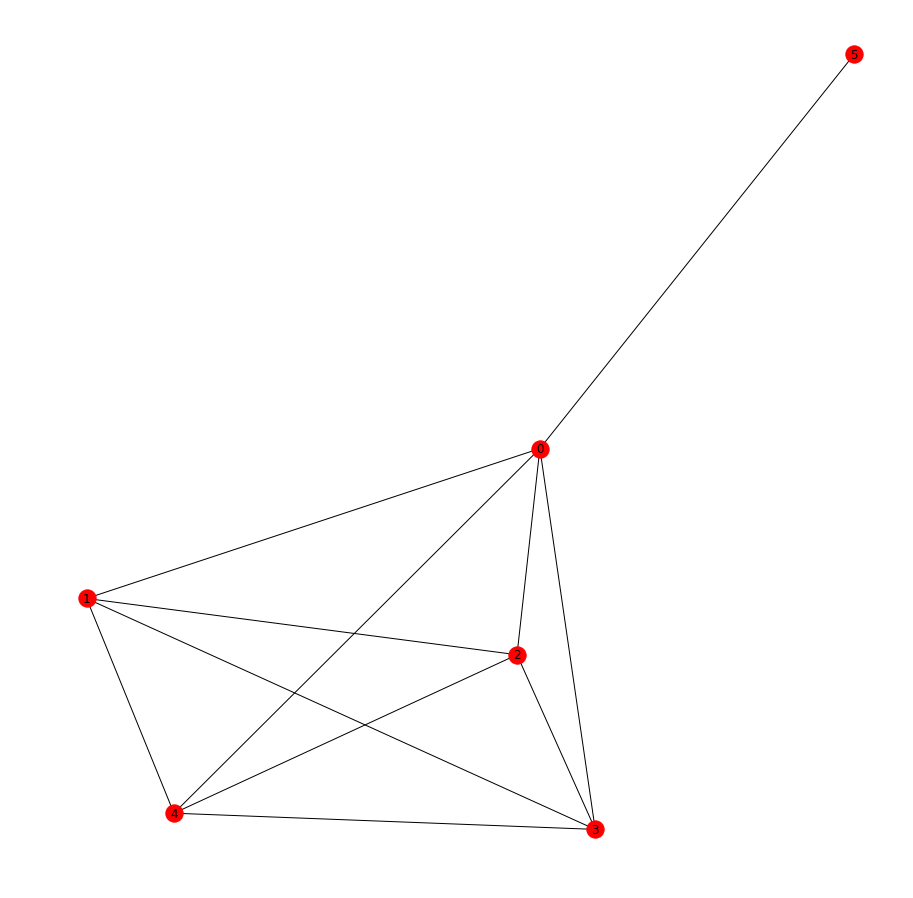

In [37]:
PlotGraph(g2.edges)

### This graph would be useless unless we can find a way to plot the count number of friend connection between the cluster.

In [82]:
def PlotGraph_1k(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(50000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.figure(figsize=(12,12))
    nx.draw(Gplot, with_labels=True)

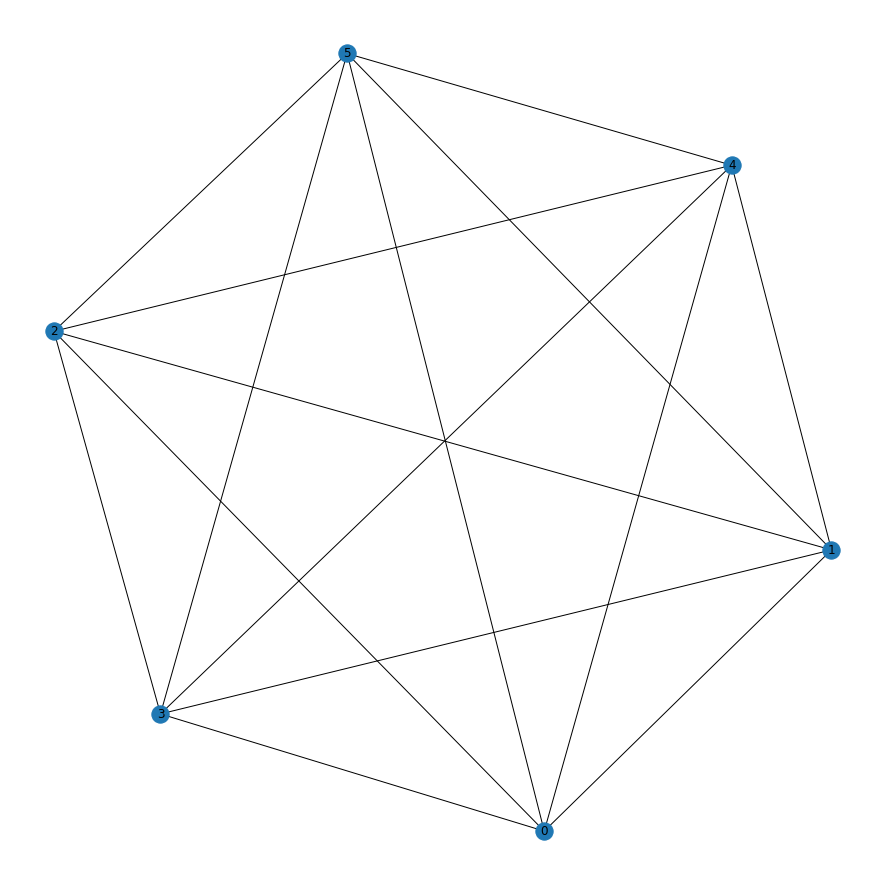

In [83]:
PlotGraph_1k(g2.edges)

In [38]:
#Most frequent connection pairs
MostFOSpairsCount = g2.edges.groupBy("src", "dst").count().orderBy("count", ascending = False)

MostFOSpairsCount.show(20)

+---+---+-------+
|src|dst|  count|
+---+---+-------+
|  1|  1|1780416|
|  3|  3| 706278|
|  3|  1| 607453|
|  1|  3| 607453|
|  4|  1| 464839|
|  1|  4| 464839|
|  4|  4| 370252|
|  2|  1| 366398|
|  1|  2| 366398|
|  2|  2| 285782|
|  3|  2| 180969|
|  2|  3| 180969|
|  3|  4| 132195|
|  4|  3| 132195|
|  2|  0|  86186|
|  0|  2|  86186|
|  1|  0|  70909|
|  0|  1|  70909|
|  3|  0|  48259|
|  0|  3|  48259|
+---+---+-------+
only showing top 20 rows



In [40]:
MostFOSpairsCount.show(36)

+---+---+-------+
|src|dst|  count|
+---+---+-------+
|  1|  1|1780416|
|  3|  3| 706278|
|  3|  1| 607453|
|  1|  3| 607453|
|  4|  1| 464839|
|  1|  4| 464839|
|  4|  4| 370252|
|  1|  2| 366398|
|  2|  1| 366398|
|  2|  2| 285782|
|  3|  2| 180969|
|  2|  3| 180969|
|  3|  4| 132195|
|  4|  3| 132195|
|  2|  0|  86186|
|  0|  2|  86186|
|  1|  0|  70909|
|  0|  1|  70909|
|  3|  0|  48259|
|  0|  3|  48259|
|  0|  0|  41038|
|  4|  2|  39171|
|  2|  4|  39171|
|  4|  0|   5751|
|  0|  4|   5751|
|  2|  5|   3549|
|  5|  2|   3549|
|  5|  1|   2717|
|  1|  5|   2717|
|  0|  5|   2683|
|  5|  0|   2683|
|  3|  5|   1874|
|  5|  3|   1874|
|  5|  5|    636|
|  5|  4|    194|
|  4|  5|    194|
+---+---+-------+



In [54]:
# Save file to plot on local machine. RCC does not support pygraphiz package
MostFOSpairsCount.write.csv('/user/tamng/jwht/Graph/MostPairsCount_Cluster.csv', header = True)

---

## RUN ON LOCAL MACHINE

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Graph.csv').getOrCreate()

%matplotlib inline

In [2]:
df = spark.read.csv('/Users/tammy/Tammy/UChiago/Big_Data/Project/MostPairsCount_Cluster.csv', header=True).coalesce(20)

In [5]:
connection = df.withColumn('src',F.when(F.col('src')==5, F.lit('The VVIP')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==5, F.lit('The VVIP')).otherwise(F.col('dst')))
connection = connection.withColumn('src',F.when(F.col('src')==3, F.lit('The Savvy')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==3, F.lit('The Savvy')).otherwise(F.col('dst')))
connection = connection.withColumn('src',F.when(F.col('src')==1, F.lit('The Ordinary')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==1, F.lit('The Ordinary')).otherwise(F.col('dst')))
connection = connection.withColumn('src',F.when(F.col('src')==2, F.lit('The Old-Fashioned')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==2, F.lit('The Old-Fashioned')).otherwise(F.col('dst')))
connection = connection.withColumn('src',F.when(F.col('src')==0, F.lit('The Early-Adopter')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==0, F.lit('The Early-Adopter')).otherwise(F.col('dst')))
connection = connection.withColumn('src',F.when(F.col('src')==4, F.lit('The Bandwagoner')).otherwise(F.col('src')))
connection = connection.withColumn('dst',F.when(F.col('dst')==4, F.lit('The Bandwagoner')).otherwise(F.col('dst')))

In [6]:
connection.show()

+-----------------+-----------------+------+
|              src|              dst| count|
+-----------------+-----------------+------+
|  The Bandwagoner|        The Savvy|132195|
|        The Savvy|  The Bandwagoner|132195|
|The Old-Fashioned|     The Ordinary|366398|
|     The Ordinary|The Old-Fashioned|366398|
|        The Savvy|The Old-Fashioned|180969|
|The Old-Fashioned|        The Savvy|180969|
|     The Ordinary|        The Savvy|607453|
|        The Savvy|     The Ordinary|607453|
|  The Bandwagoner|     The Ordinary|464839|
|     The Ordinary|  The Bandwagoner|464839|
|  The Bandwagoner|The Old-Fashioned| 39171|
|The Old-Fashioned|  The Bandwagoner| 39171|
|The Old-Fashioned|The Early-Adopter| 86186|
|The Early-Adopter|The Old-Fashioned| 86186|
|The Early-Adopter|        The Savvy| 48259|
|        The Savvy|The Early-Adopter| 48259|
|The Early-Adopter|     The Ordinary| 70909|
|     The Ordinary|The Early-Adopter| 70909|
|The Early-Adopter|         The VVIP|  2683|
|         

/Users/tammy/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


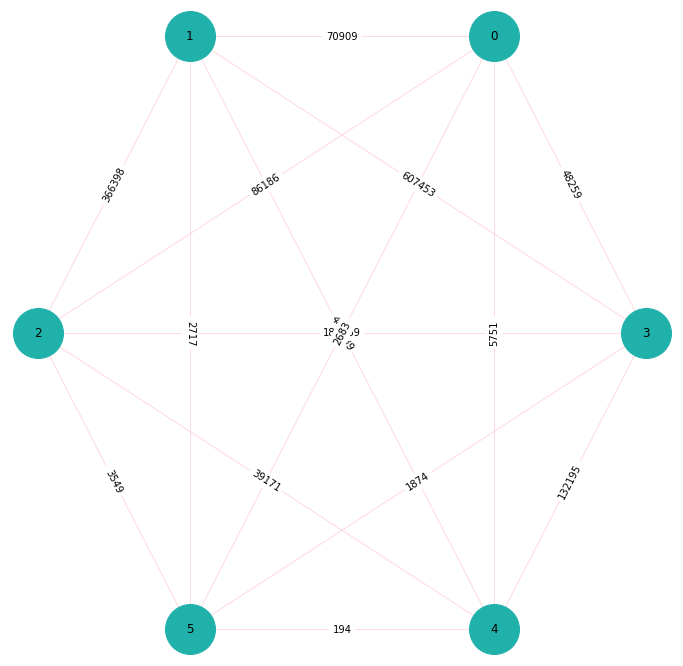

In [7]:
from networkx.drawing.nx_agraph import graphviz_layout

FG=nx.Graph()
for row in df.select('src','dst', 'count').take(5000):
    FG.add_edge(row['src'],row['dst'], weight = row['count'])

#pos = graphviz_layout(FG)
# ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
pos = graphviz_layout(FG, prog='circo', args='')
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(FG,pos,node_color='lightseagreen',alpha = 1, node_size= 2500, vmax =5.7)  # draws nodes

#Get weights
weights = [FG[u][v]['weight'] for u,v in FG.edges()]
nx.draw_networkx_edges(FG,pos,edge_color='pink',alpha = 0.6,node_size = 5000)#width=np.log(weights))  # draws edges
nx.draw_networkx_edge_labels(FG,pos,edge_labels = nx.get_edge_attributes(FG,'weight')) # edge lables
nx.draw_networkx_labels(FG,pos) # node lables

plt.show()

### Change type of plot

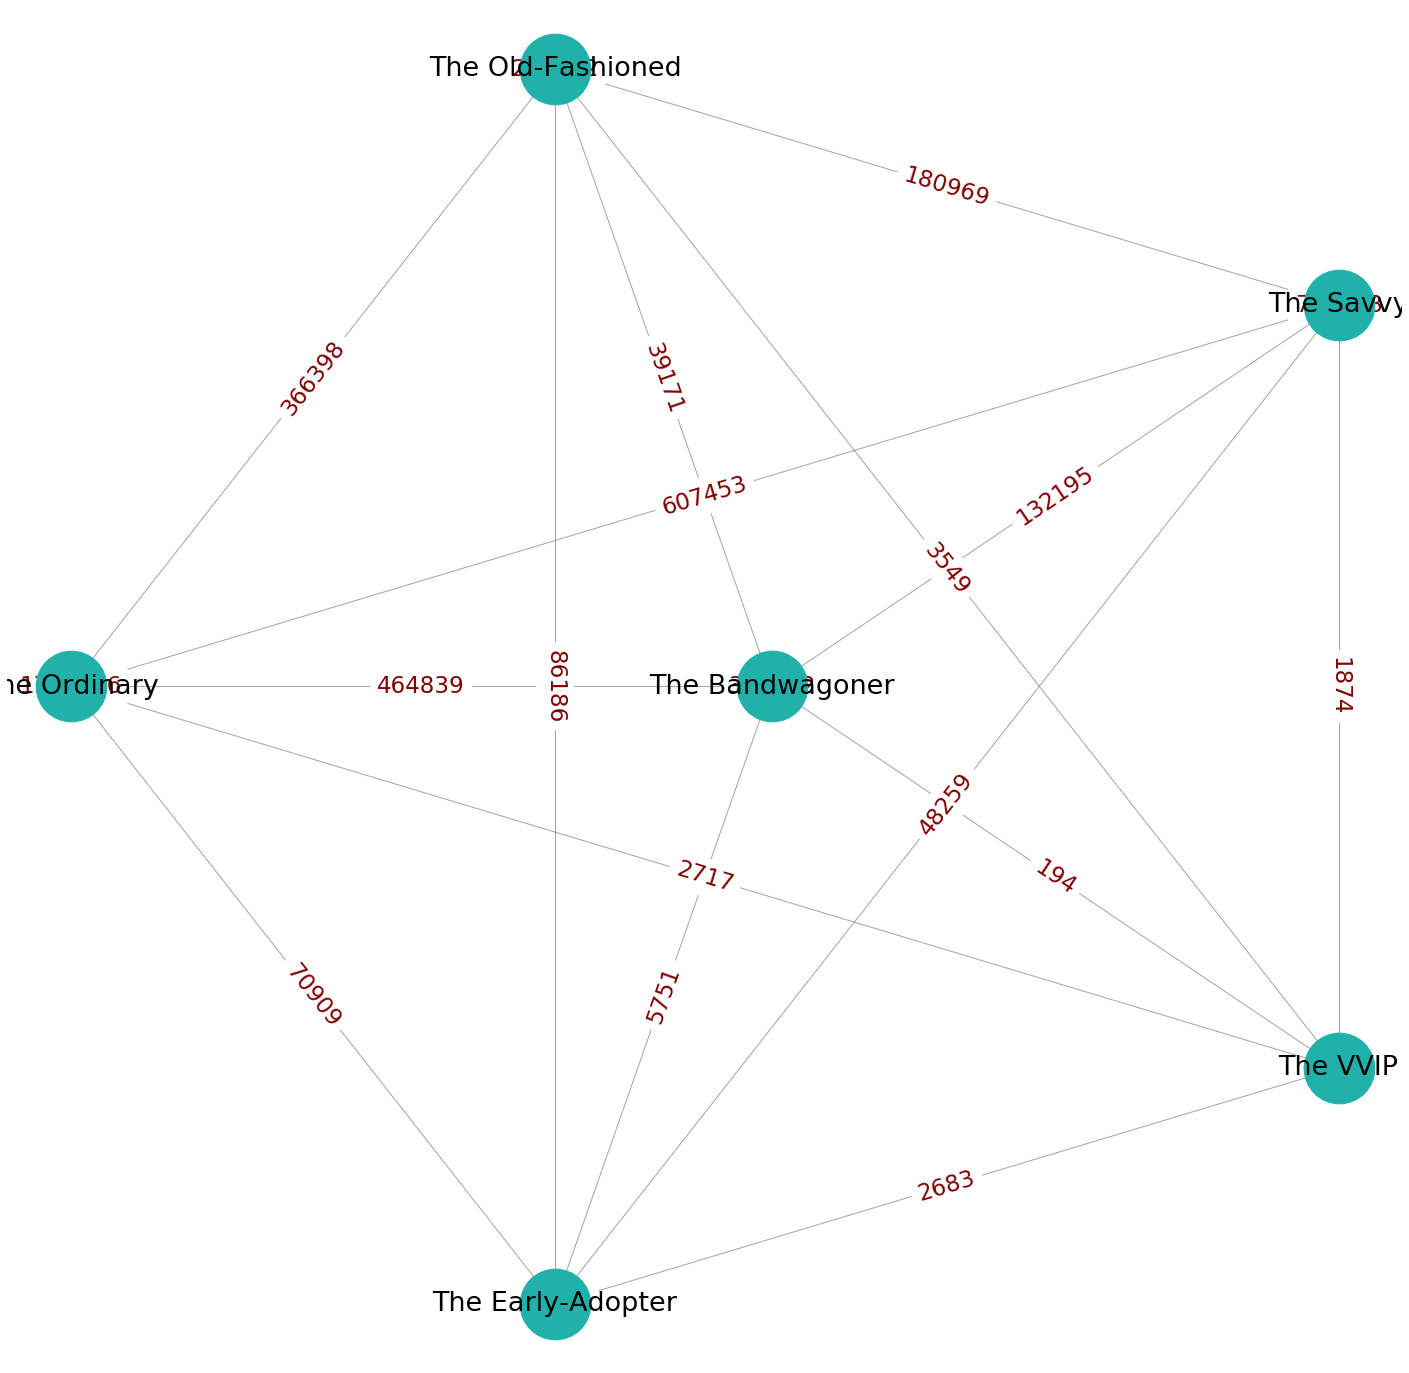

In [8]:
from networkx.drawing.nx_agraph import graphviz_layout

FG=nx.Graph()
for row in connection.select('src','dst', 'count').take(5000):
    FG.add_edge(row['src'],row['dst'], weight = row['count'])

#pos = graphviz_layout(FG)
# ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
pos = graphviz_layout(FG, prog='twopi', args='')
plt.figure(figsize=(25,25))
plt.axis('off')
nx.draw_networkx_nodes(FG,pos,node_color='lightseagreen',alpha = 1, node_size= 5000)  # draws nodes

#Get weights
weights = [FG[u][v]['weight'] for u,v in FG.edges()]
nx.draw_networkx_edges(FG,pos,edge_color='dimgray',alpha = 0.6,node_size = 5000)#width=np.log(weights))  # draws edges
nx.draw_networkx_edge_labels(FG,pos,edge_labels = nx.get_edge_attributes(FG,'weight'), font_color='maroon', font_size=23) # edge lables
nx.draw_networkx_labels(FG,pos, font_size=27) # node lables

plt.show()

### Future work: Add in game into each cluster. 

----
### APPENDIX

In [10]:
game = players_app.select(players_app.app_id.alias('id'), 'title', 'type','isMultiplayer','year', 'playtime_forever')

In [17]:
game = game.dropDuplicates()
game.count()

4234220

In [96]:
# vertices_app = 
app_aggrgate = players_app.groupby('app_id').agg(F.sum('price').alias('total_revenue'),
                                 F.sum('playtime_forever').alias('total_playtime'))

In [97]:
app_aggrgate.count()

3493

In [106]:
game = game.join(app_aggrgate, game.id == app_aggrgate.app_id).drop('app_id')

In [107]:
game.show(2)

+----+-------------+----+-------------+----+------------------+--------------+
|  id|        title|type|isMultiplayer|year|     total_revenue|total_playtime|
+----+-------------+----+-------------+----+------------------+--------------+
|4900|Zen of Sudoku|game|            0|2006| 8767.429999999995|       2516321|
|7340|        Azada|game|            0|2010|1088.9100000000008|         27519|
+----+-------------+----+-------------+----+------------------+--------------+
only showing top 2 rows



In [ ]:
df1 = players_app.select('steam_id', 'app_id', 'playtime_forever','title', 'price', 'year', 'cluster')

In [11]:
game_gdp = spark.read.csv('/user/tamng/jwht/CleanData/game_dgp.csv', inferSchema = True, header = True)

In [12]:
game_gdp.limit(5).toPandas()

,app_id,gamesDeveloper,gamesGenre,gamesPublisher
0,10,Valve,Action,Valve
1,20,Valve,Action,Valve
2,30,Valve,Action,Valve
3,40,Valve,Action,Valve
4,50,Gearbox Software,Action,Valve


### Game_dgp

__Game developer__

In [13]:
df2 = game_gdp.select(game_gdp.app_id.alias('src'),game_gdp.gamesDeveloper.alias('dst')).withColumn('type', F.lit('developer')).dropDuplicates()

In [14]:
df2.show(5, truncate = True)

+-----+----------------+---------+
|  src|             dst|     type|
+-----+----------------+---------+
|  730|           Valve|developer|
| 2520| CINEMAX, s.r.o.|developer|
| 9219|     id Software|developer|
|11590|Deep Red Limited|developer|
|16120|Last Day of Work|developer|
+-----+----------------+---------+
only showing top 5 rows



In [15]:
df2.count()

19333

In [16]:
check_missing(df2)

+---+---+----+
|src|dst|type|
+---+---+----+
|  0|  0|   0|
+---+---+----+



__Game publisher__

In [17]:
df3 = game_gdp.select(game_gdp.app_id.alias('src'),game_gdp.gamesPublisher.alias('dst')).withColumn('type', F.lit('publisher')).dropDuplicates()

In [18]:
df3.show(5, truncate = True)

+-----+--------------------+---------+
|  src|                 dst|     type|
+-----+--------------------+---------+
|  300|               Valve|publisher|
| 4550|        Nordic Games|publisher|
| 6980|         Square Enix|publisher|
|10604|Feral Interactive...|publisher|
|24860|     Electronic Arts|publisher|
+-----+--------------------+---------+
only showing top 5 rows



In [19]:
df3.count()

18511

In [20]:
check_missing(df3)

+---+----+----+
|src| dst|type|
+---+----+----+
|  0|2461|   0|
+---+----+----+



In [21]:
df3 = df3.filter(~F.col('dst').isNull())

__Union game_developer & game publisher__

In [22]:
edges_gameDevPub = df2.union(df3)
edges_gameDevPub.count()

35383

In [23]:
g_game = GraphFrame(game, df2)

In [24]:
g_game.edges.show()

+------+--------------------+---------+
|   src|                 dst|     type|
+------+--------------------+---------+
|   730|               Valve|developer|
|  2520|     CINEMAX, s.r.o.|developer|
|  9219|         id Software|developer|
| 11590|    Deep Red Limited|developer|
| 16120|    Last Day of Work|developer|
| 18120|          Futuremark|developer|
| 18400|       Fakt Software|developer|
| 22361|       Splash Damage|developer|
| 24058|      Dovetail Games|developer|
| 34810|    City Interactive|developer|
| 40392|       Piranha Bytes|developer|
| 41510|         Runic Games|developer|
| 42000|           Trinoteam|developer|
| 47400|     FireFly Studios|developer|
| 55389|            Volition|developer|
| 93200|          Puppygames|developer|
|204281|           Blue Byte|developer|
|205090|        Gaijin Games|developer|
|205610|        Gaming Minds|developer|
|206106|Ubisoft - San Fra...|developer|
+------+--------------------+---------+
only showing top 20 rows



In [25]:
X  = g_game.edges.groupBy('src', 'type').count().orderBy('count', ascending= False)
X.show(5)

+------+---------+-----+
|   src|     type|count|
+------+---------+-----+
|337930|developer|    7|
|414675|developer|    7|
|415340|developer|    7|
|415040|developer|    7|
|414674|developer|    7|
+------+---------+-----+
only showing top 5 rows



In [26]:
X  = g_game.edges.groupBy('dst', 'src').count().orderBy('count', ascending= False)
X.show(5)

+--------------------+------+-----+
|                 dst|   src|count|
+--------------------+------+-----+
|Adventure Plannin...|373090|    1|
|       Unigine Corp.|200390|    1|
|        Monkeybin AS|399530|    1|
|          Eren Ayd?n|454070|    1|
|Surreal Distractions|334880|    1|
+--------------------+------+-----+
only showing top 5 rows



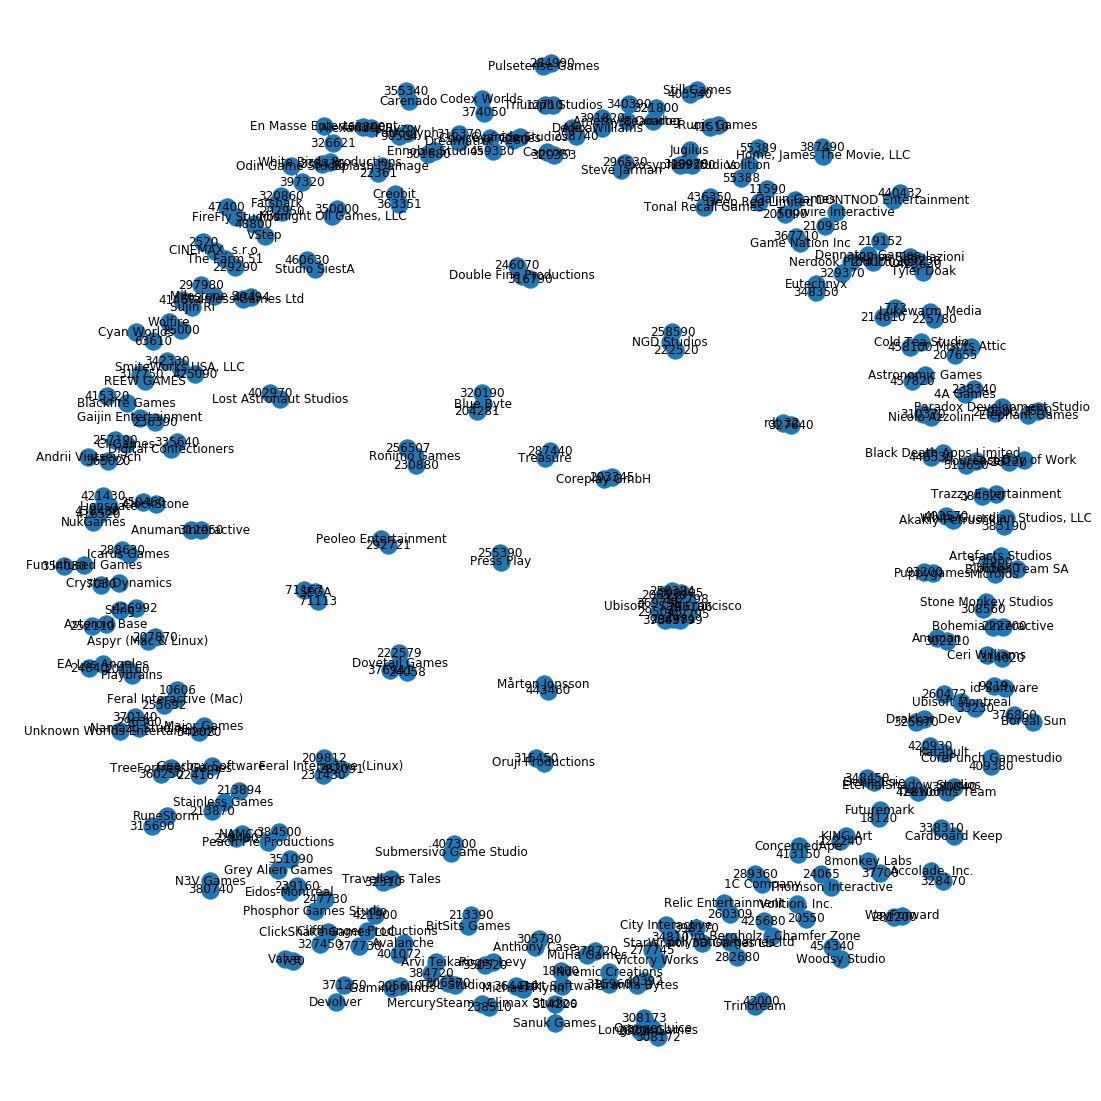

In [33]:
FG = nx.Graph()
for row in g_game.edges.select('src','dst').take(200):
    FG.add_edge(row['src'],row['dst'])

plt.figure(figsize=(15,15))
nx.draw_spring(FG, with_labels = True)

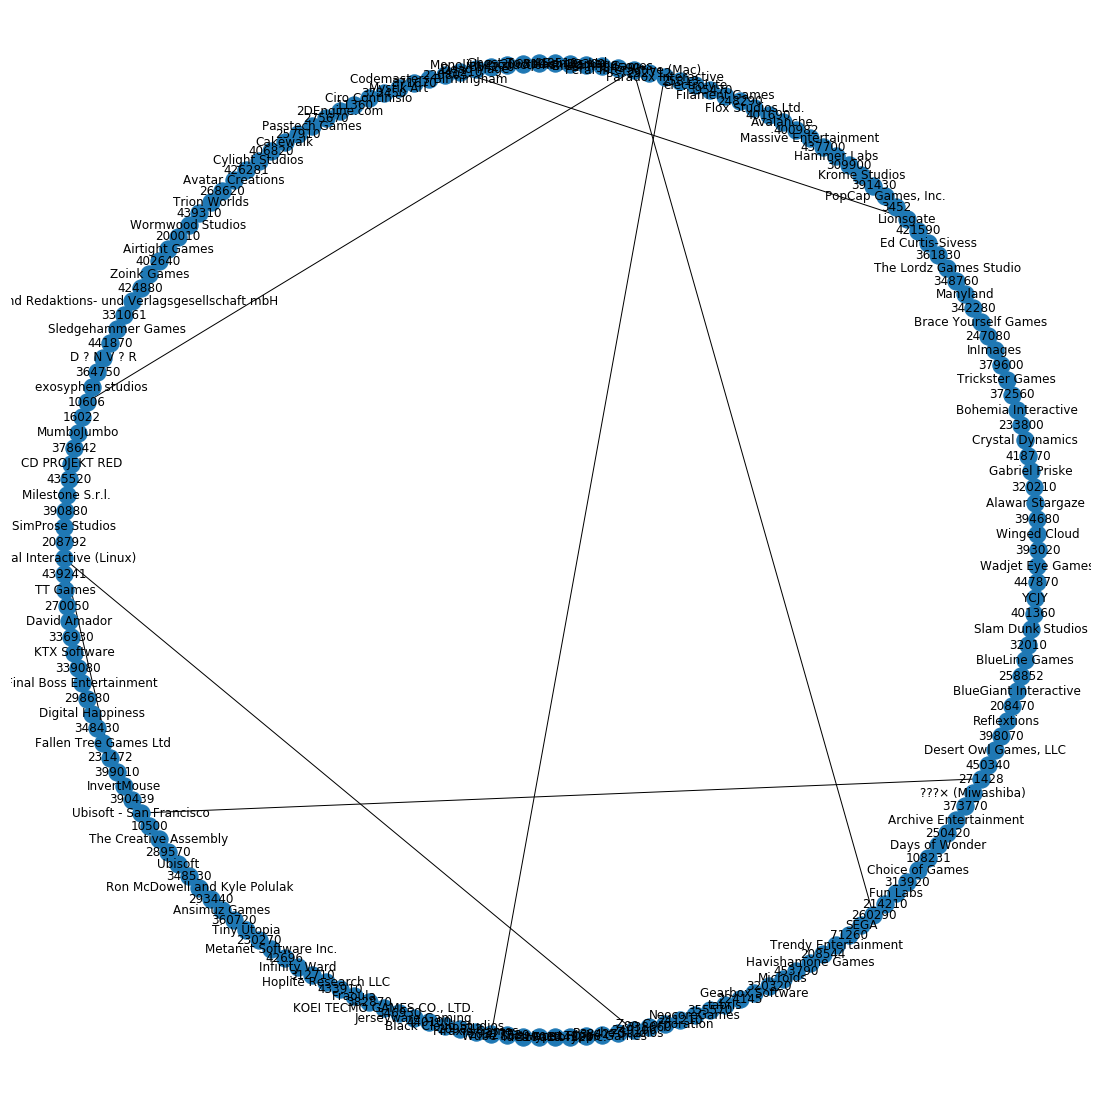

In [166]:
FG = nx.Graph()
for row in X.select('src','dst', 'count').take(100):
    FG.add_edge(row['src'],row['dst'], weight = row['count'])

# pos = graphviz_layout(FG, prog='twopi', args='')
plt.figure(figsize=(15,15))
nx.draw_circular(FG, with_labels = True)

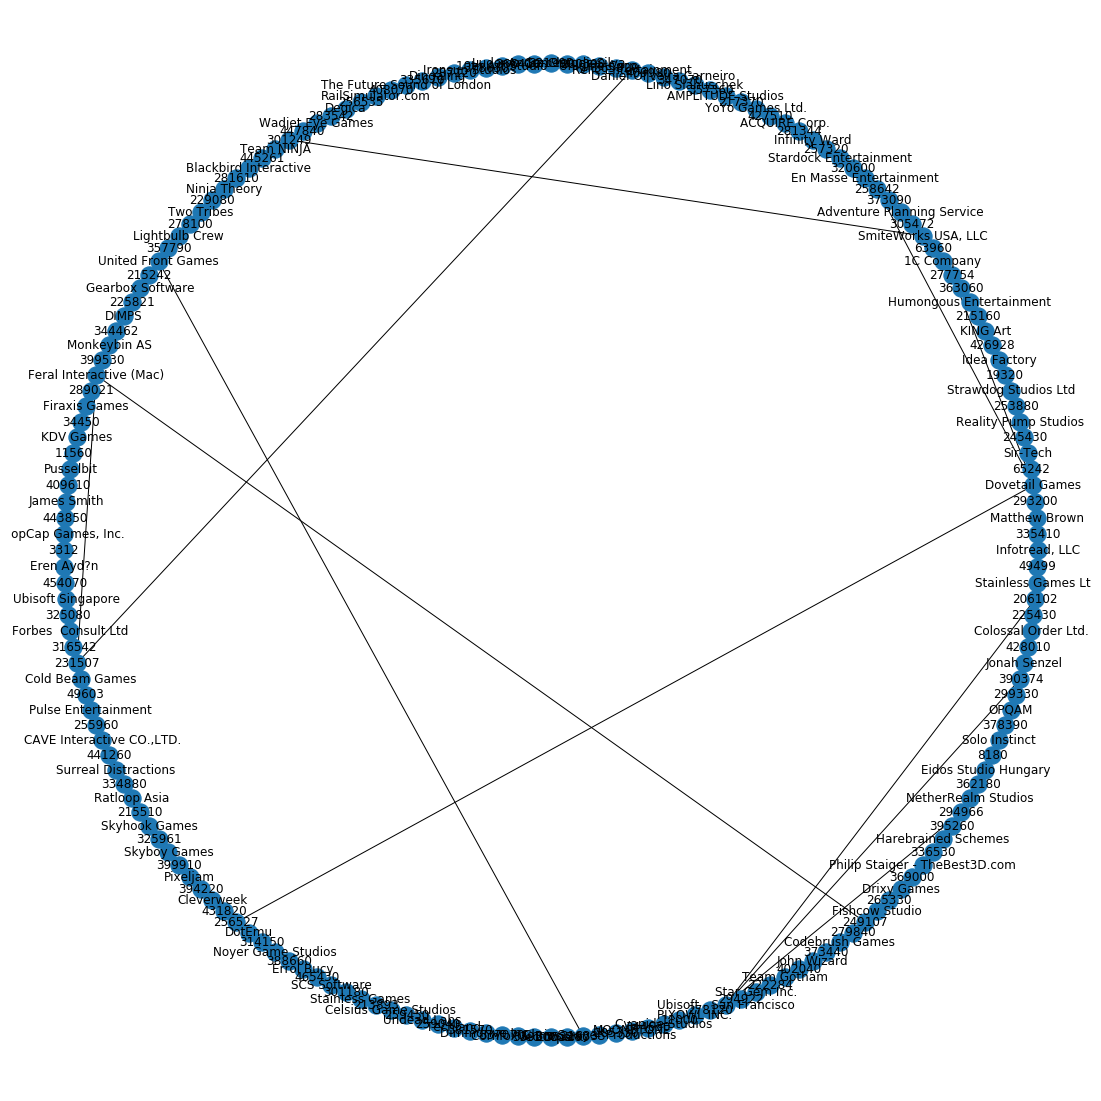

In [168]:
FG = nx.Graph()
for row in X.select('dst','src', 'count').take(100):
    FG.add_edge(row['dst'],row['src'], weight = row['count'])

# pos = graphviz_layout(FG, prog='twopi', args='')
plt.figure(figsize=(15,15))
nx.draw_circular(FG, with_labels = True)